In [50]:
import pandas as pd

# Data Input
MS_3 = pd.read_excel("MS3 Analysis.xlsx")

# Section Data

OIS_CM = MS_3.iloc[:, [0, 1, 2, 19]].copy()
OIS_F20 = MS_3.iloc[:, [3, 4, 5, 19]].copy()
OIS_F8 = MS_3.iloc[:, [6, 7, 8, 19]].copy()

Vector_CM = MS_3.iloc[:, [9, 10, 11, 19]].copy()
Vector_F20 = MS_3.iloc[:, [12, 13, 14, 19]].copy()
Vector_F8 = MS_3.iloc[:, [15, 16, 17, 19]].copy()

Gene_Name = MS_3.iloc[:, [18, 19]].copy()

# Means
OIS_CM_Mean = OIS_CM.iloc[:, :3].mean(axis=1)
OIS_F20_Mean = OIS_F20.iloc[:, :3].mean(axis=1)
OIS_F8_Mean = OIS_F8.iloc[:, :3].mean(axis=1)

Vector_CM_Mean = Vector_CM.iloc[:, :3].mean(axis=1)
Vector_F20_Mean = Vector_F20.iloc[:, :3].mean(axis=1)
Vector_F8_Mean = Vector_F8.iloc[:, :3].mean(axis=1)

# Summary of Mean
Summary_Means = Gene_Name.copy()

Summary_Means['OIS_CM'] = OIS_CM_Mean.values
Summary_Means['OIS_F20'] = OIS_F20_Mean.values
Summary_Means['OIS_F8'] = OIS_F8_Mean.values

Summary_Means['Vector_CM'] = Vector_CM_Mean.values
Summary_Means['Vector_F20'] = Vector_F20_Mean.values
Summary_Means['Vector_F8'] = Vector_F8_Mean.values

# Add Means to Data Frame
OIS_CM['Mean'] = OIS_CM_Mean.values
OIS_F20['Mean'] = OIS_F20_Mean.values
OIS_F8['Mean'] = OIS_F8_Mean.values

Vector_CM['Mean'] = Vector_CM_Mean.values
Vector_F20['Mean'] = Vector_F20_Mean.values
Vector_F8['Mean'] = Vector_F8_Mean.values

# Export to Excel
Summary_Means.to_csv("Summary Means MS3.csv", index=False)

# Means Transposed for PCA
Mean_Transpose = pd.read_excel("Summary Means MS3.xlsx")

# All Data Transposed for PCA
Transpose = pd.read_excel("Transposed MS3.xlsx")

# Import Summary Data Without Heading "Transposed MS3"
Summary_Transpose = pd.read_excel("Transposed MS3.xlsx", header=None)


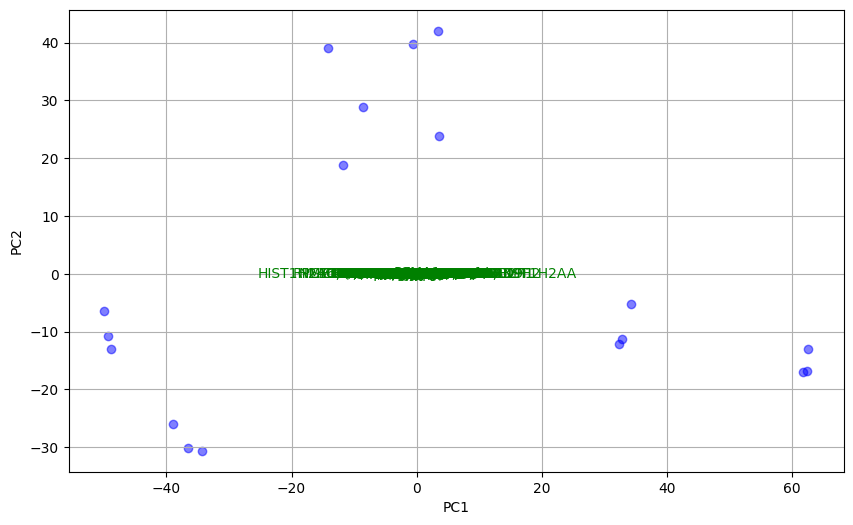

Unique samples: {'RAS_CM_2', 'RAS_F8_1', 'Vector_F8_1', 'RAS_F20_3', 'Vector_CM_3', 'RAS_CM_1', 'Vector_F20_3', 'RAS_F20_2', 'Vector_CM_1', 'Vector_F20_1', 'RAS_CM_3', 'RAS_F8_3', 'Vector_F20_2', 'Vector_F8_3', 'Vector_F8_2', 'RAS_F8_2', 'RAS_F20_1', 'Vector_CM_2'}
Unique colours: {'RAS_CM_2', 'RAS_F20_3', 'Vector_CM_3', 'RAS_CM_1', 'Vector_F20_3', 'RAS_F20_2', 'Vector_CM_1', 'Vector_F20_1', 'RAS_CM_3', 'RAS_F8_3', 'Vector_F8_1', 'RAS_F20_1', 'Vector_F8_3', 'Vector_F20_2', 'Vector_F8_2', 'RAS_F8_2', 'RAS_F8_1', 'Vector_CM_2'}


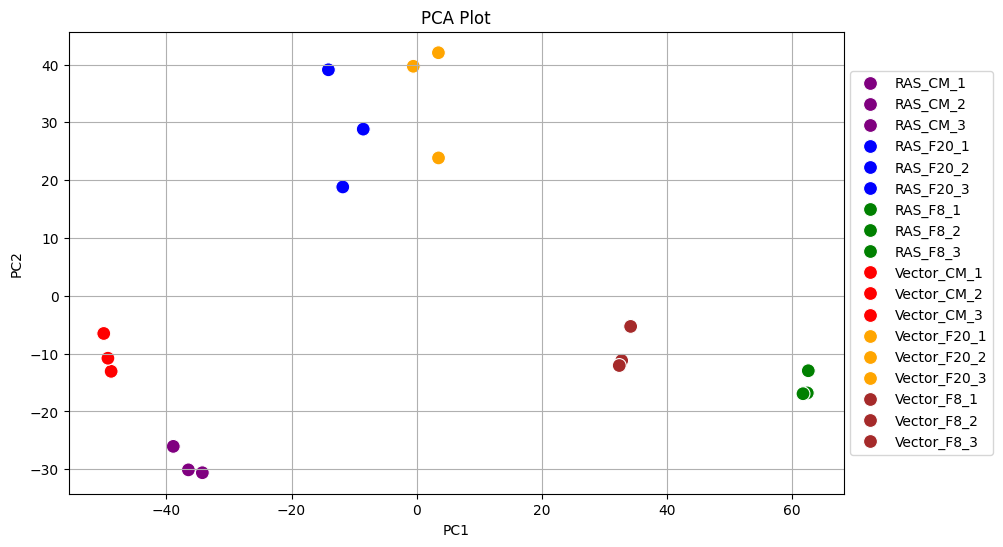

In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA Analysis
Transpose_data = Transpose.iloc[:, 1:]  # Drop the first column by index
Transpose_data.columns = [str(col) for col in Transpose_data.columns]  # Convert feature names to strings
pca = PCA()
pca.fit(Transpose_data)

# Biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(score[:,0], score[:,1], color='b', alpha=0.5)
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, Transpose_data.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

biplot(pca.transform(Transpose_data)[:,0:2], pca.components_.T[:,0:2], labels=Transpose_data.columns)

# Extract PC Scores
PC_scores = pca.transform(Transpose_data)

# Combine with Transpose
PCAplot = pd.concat([Transpose, pd.DataFrame(PC_scores[:, :2], columns=['PC1', 'PC2'])], axis=1)

# Making a Plot
# Making a Plot
Sample = []
for index, row in Transpose.iterrows():
    x = row.iloc[0]  # Access the value of the first column
    if 'RAS_CM' in x:
        Sample.append('RAS_CM_' + x[-1])  # Append numerical suffix to match the keys in colours
    elif 'RAS_F8' in x:
        Sample.append('RAS_F8_' + x[-1])
    elif 'RAS_F20' in x:
        Sample.append('RAS_F20_' + x[-1])
    elif 'STOP_CM' in x:
        Sample.append('Vector_CM_' + x[-1])
    elif 'STOP_F8' in x:
        Sample.append('Vector_F8_' + x[-1])
    elif 'STOP_F20' in x:
        Sample.append('Vector_F20_' + x[-1])


# Print samples and corresponding colors for debugging
print("Unique samples:", set(Sample))
print("Unique colours:", set(colours.keys()))

# Assign colors based on sample categories, handling cases where a sample category is not found in the colours dictionary
colors_to_plot = [colours.get(sample, 'gray') for sample in Sample]

# Create PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PCAplot, x='PC1', y='PC2', hue=Sample, palette=colours.values(), s=100)
plt.title('PCA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position
plt.show()

<Figure size 200x100 with 0 Axes>

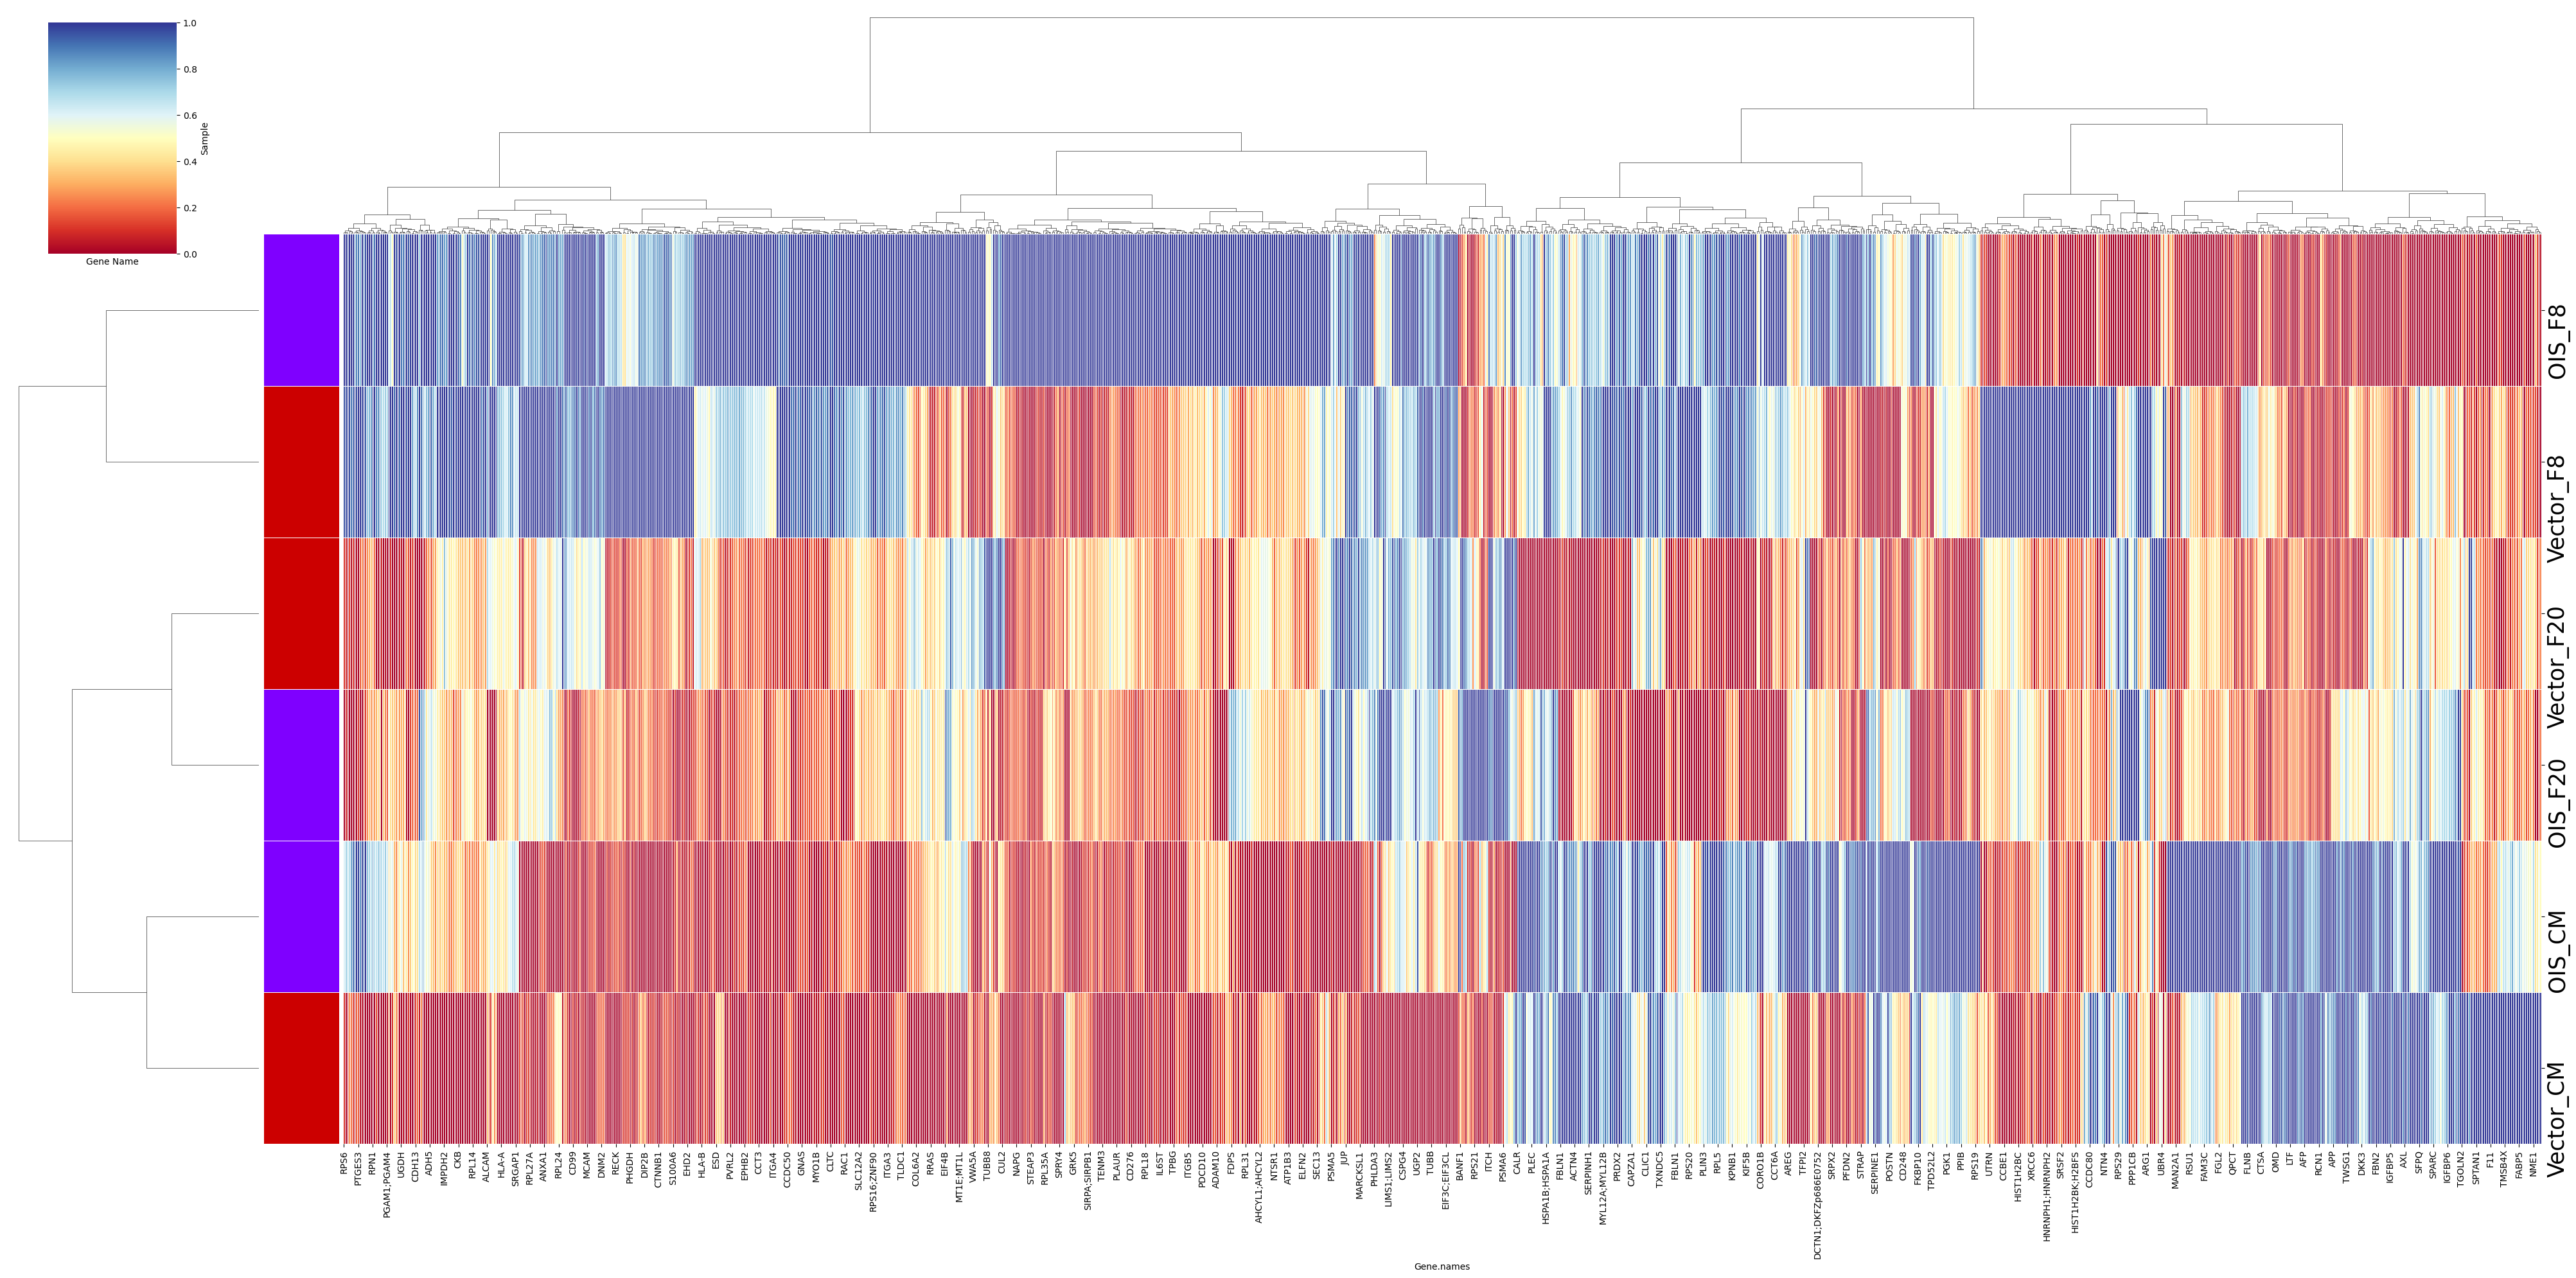

In [83]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
Mean_Transpose = pd.read_excel("Summary Means MS3.xlsx", index_col=0)

# Transpose the DataFrame
input_data = Mean_Transpose.T

# Convert all column names to strings
input_data.columns = input_data.columns.astype(str)

# Define condition colors
condition_colors = {'OIS': '#7F00FF', 'Vector': '#CC0000'}

# Assign colors based on sample categories
condition_colors_list = [condition_colors[x.split('_')[0]] for x in input_data.index]

# Scale each column individually
scaler = MinMaxScaler()
input_data_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns, index=input_data.index)

# Plot heatmap with hierarchical clustering dendrograms on the x-axis and side colors
plt.figure(figsize=(2, 1))  # Adjust the total size of the plot here
clustermap = sns.clustermap(input_data_scaled, cmap='RdYlBu', cbar_kws={'label': 'Scaled Value'}, linewidths=0.5,
               row_cluster=True, figsize=(40, 20), dendrogram_ratio=(.1, .2), method='ward',
               row_colors=condition_colors_list)

# Increase font size of y-axis labels
clustermap.ax_heatmap.yaxis.set_tick_params(labelsize=25)

plt.xlabel('Gene Name')
plt.ylabel('Sample')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
